In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = '../data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
plt.style.available
plt.style.use('ggplot')

Text(0, 0.5, 'Amount of people')

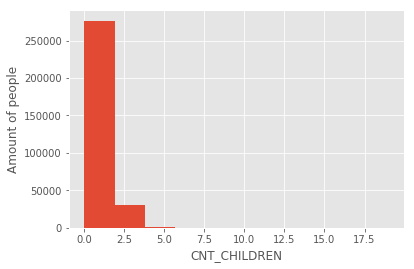

In [6]:
plt.hist(app_train['CNT_CHILDREN'])
plt.xlabel('CNT_CHILDREN')
plt.ylabel('Amount of people')

Text(0, 0.5, 'Amount of people')

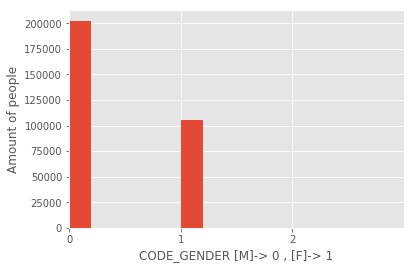

In [7]:
gender_train  = app_train['CODE_GENDER'].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(gender_train)
gender_train = le.transform(gender_train)
plt.hist(gender_train)
plt.xlim((0, 3))
plt.xticks(np.arange(0, 3, 1))
plt.xlabel('CODE_GENDER [M]-> 0 , [F]-> 1')
plt.ylabel('Amount of people')

Text(0, 0.5, 'AMT_CREDIT')

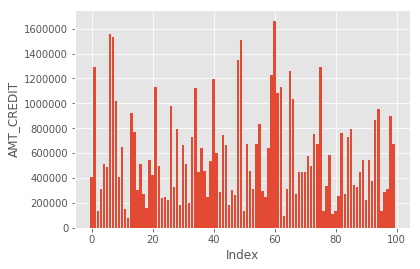

In [8]:
index = app_train['AMT_CREDIT'][0:100].index.tolist()
val = app_train['AMT_CREDIT'][0:100]
plt.bar(index,val)
plt.xlabel('Index')
plt.ylabel('AMT_CREDIT')

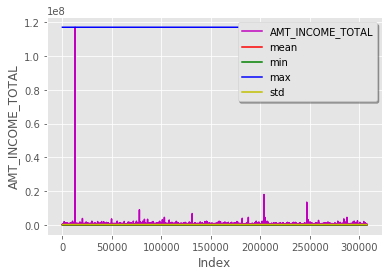

In [29]:
val_num = np.ones(len(app_train['AMT_INCOME_TOTAL']))
val_mean = val_num * app_train['AMT_INCOME_TOTAL'].mean()
val_min = val_num * app_train['AMT_INCOME_TOTAL'].min()
val_max = val_num * app_train['AMT_INCOME_TOTAL'].max()
val_std = val_num * app_train['AMT_INCOME_TOTAL'].std()
#plt.ylim(0, 2)
#plt.yticks(np.arange(0, 2, 0.3))
fig , ax = plt.subplots()
plt.plot(app_train['AMT_INCOME_TOTAL'],color='m')
plt.plot(val_mean,color = 'r', label='mean')
plt.plot(val_min,color = 'g', label='min')
plt.plot(val_max,color = 'b', label='max')
plt.plot(val_std,color = 'y', label='std')
plt.ylabel('AMT_INCOME_TOTAL')
plt.xlabel('Index')
leg = ax.legend(loc='upper right', shadow=True) 

Text(0.5, 0, 'SK_ID_CURR')

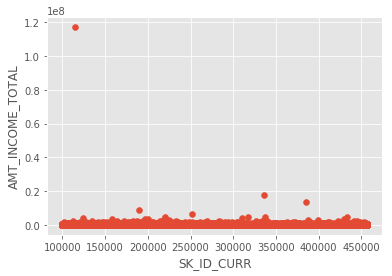

In [10]:
plt.scatter(app_train['SK_ID_CURR'], app_train['AMT_INCOME_TOTAL'])
plt.ylabel('AMT_INCOME_TOTAL')
plt.xlabel('SK_ID_CURR')

In [11]:
app_train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

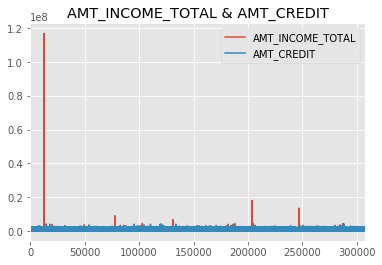

In [16]:
#pandas
app_train.loc[:,'AMT_INCOME_TOTAL':'AMT_CREDIT'].plot(title='AMT_INCOME_TOTAL & AMT_CREDIT')
#df = pd.DataFrame(app_train['AMT_INCOME_TOTAL':'AMT_CREDIT'],columns='AMT_INCOME_TOTAL')

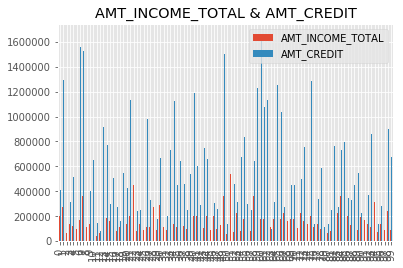

In [17]:
app_train.loc[:,'AMT_INCOME_TOTAL':'AMT_CREDIT'][:100].plot(kind='bar',title='AMT_INCOME_TOTAL & AMT_CREDIT')